## 데이터 로드
`수면건강과 생활습관 데이터셋` 에 대한 분석을 위해 데이터셋을 로드한다.

In [2]:
from Song_Jihun.basis import *

df = pd.read_csv("../data/Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 데이터 확인 및 전처리 의견
1. `Sleep Disorder` 의 결측치는 _질병이 없다_ 는 의미이므로 결측치 처리 시 _None_ 으로 처리하는게 좋겠다.
2. `Blood Pressure` 는 최고/최저 수치가 모여있으므로 `BP high` 와 `BP low` 로 분리해야겠다.
3. 그 밖에 범주형 데이터들은 수치형으로 변환한다.
4. 전처리가 완료되면, 복사본 DF 를 만들고 `Person ID` 항목을 제거하고 보는게 좋겠다.

## 데이터 메타통계 확인
각 컬럼에 데이터는 몇 개인지, 결측치는 몇개인지 등을 확인해봐야겠다.
1. 결측치는 isna().sum() 으로 확인하고, 이상치는 boxplot 을 그려서 확인해보면 좋겠다.
    1.

컬럼별 정상치 개수
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)


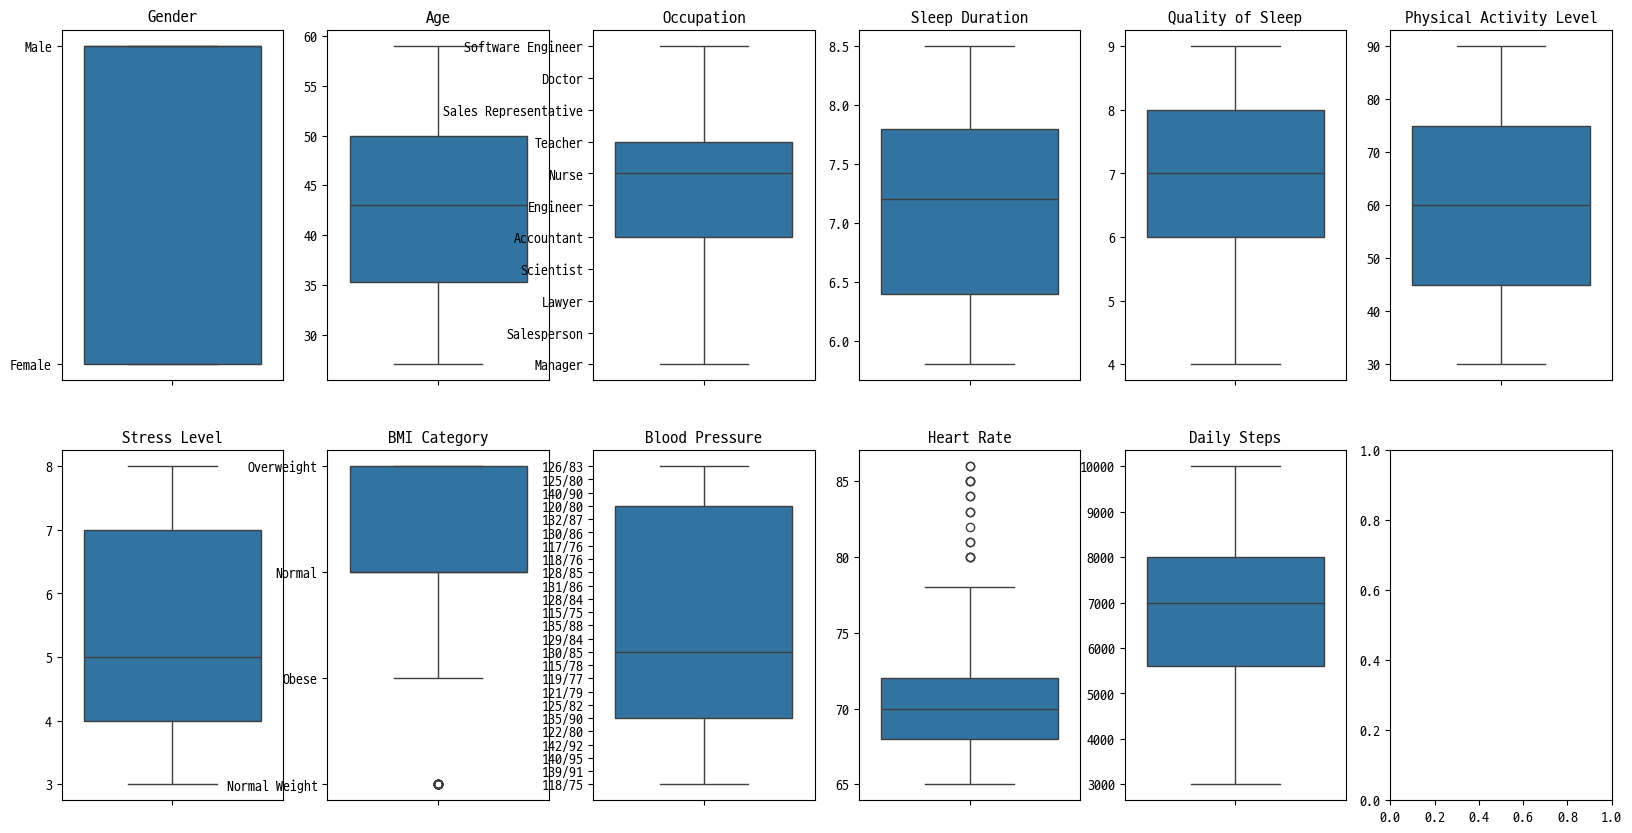

In [3]:
print("컬럼별 정상치 개수" , end="\n---------------------------------\n")
print(df.info()            , end="\n---------------------------------\n")
print("결측치 개수"        , end="\n---------------------------------\n")
print(df.isna().sum()      , end="\n---------------------------------\n")

fig, ax = plt.subplots(2,6)
fig.set_figwidth(20)
fig.set_figheight(10)

for i,col in enumerate(df.iloc[:, 1:12].columns):
	_ax = ax[i//6, i%6]
	sns.boxplot(df, y=col, ax=_ax)
	_ax.set(ylabel="", title=col)

plt.show()

1. 결측치에 대해서는 걱정할 필요가 없어보인다.
2. `Gender` 는 그래프 모양은 좀 이상해도, Mail/Female 로 잘 나뉘어있으므로 라벨링만 추가로 조치해야겠다.
3. `BMI Category` 는 범주형 데이터이므로 이상치보다는 분포를 확인하는 것이 더 좋겠다.
4. `Blood Pressuer` 는 계획대로 분리한 다음 다시 확인이 필요하다.
5. `Heart Rate` 는 이상치가 있는걸까? 다른 시각화 툴을 이용해 추가 확인이 필요하다.


## 데이터 전처리
전처리 작업 순서는 이렇게 가야겠다.
1. `Heart Rate` 이상치 확인
2. `Blood Pressure` 분리
3. 연속형 특성들의 범주화
    - `Age`, `BP high`, `BP low`, `Heart Rate`, `Daily Steps`
4. 범주화 특성들의 라벨링

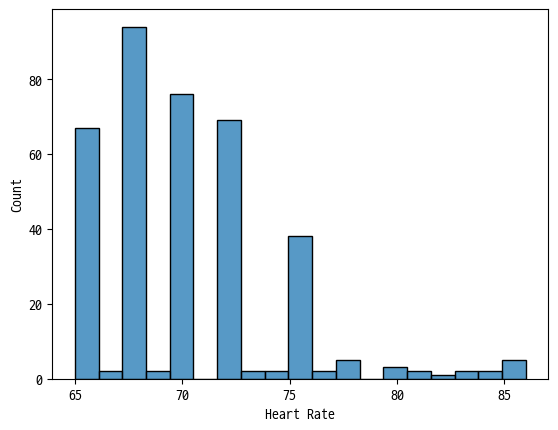

In [4]:
# Heart Rate 이상치 확인
heartRate = df["Heart Rate"]
sns.histplot(df, x=heartRate)
plt.show()

In [6]:
# Blood Pressure 분리
def bp_high(bp):	return bp.split("/")[0]
def bp_low(bp): 	return bp.split("/")[1]
df["BP high"] = df["Blood Pressure"].apply(bp_high).astype(int)
df["BP low"]  = df["Blood Pressure"].apply(bp_low).astype(int)
df.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BP high,BP low
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80


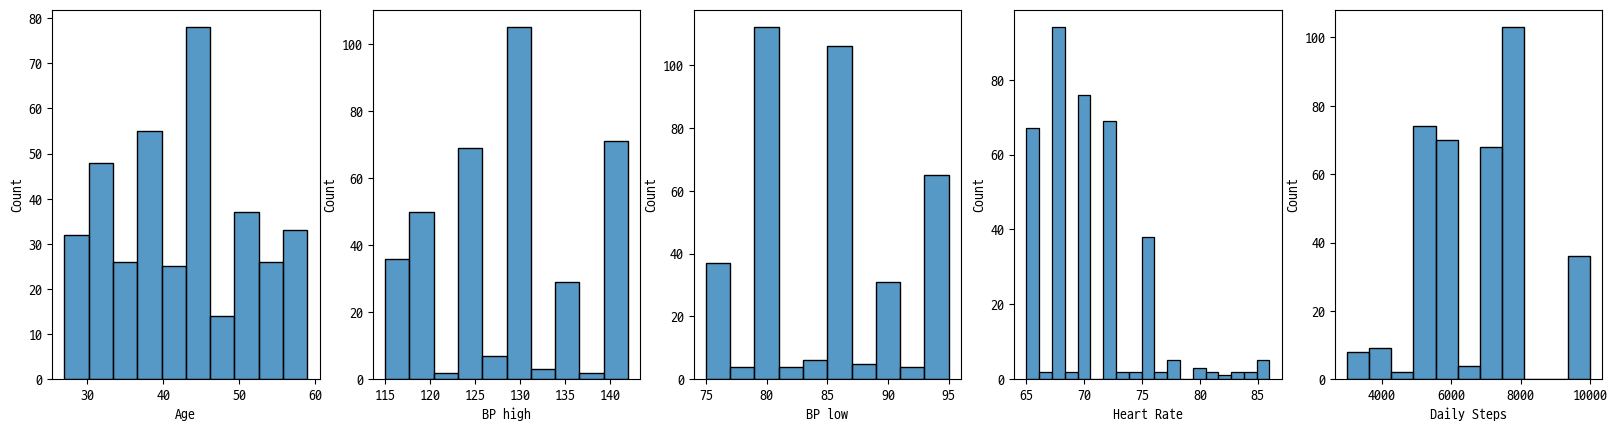

In [12]:
# 연속형 특성들의 범주화
# `Age`, `BP high`, `BP low`, `Heart Rate`, `Daily Steps`
features = ["Age", "BP high", "BP low", "Heart Rate", "Daily Steps"]
fig, ax = plt.subplots(1, len(features))
fig.set_figwidth(20)
for i,col in enumerate(features):
    sns.histplot(df[col], label=col, ax=ax[i])
plt.show()

df["Age Group"] = df["Age"].apply(lambda x : x // 10)       # 나이는 이미 범주화 + 라벨링이 됨.

min_bph, max_bph = df["BP high"].min(), df["BP high"].max()
min_bpl, max_bpl = df["BP low"].min(), df["BP low"].max()
df["BPH Group"] =


In [ ]:
# 범주화 특성들의 라벨링

from sklearn.preprocessing import LabelEncoder

# encoders = []
# for col in features:
# 	encoder = LabelEncoder()
# 	df[col] = encoder.fit_transform(df[col])
# 	encoders.append(encoder)
# df.head(3)

## 전처리 완료 후 데이터 확인
전처리가 완료된 상태에서 pairplot 등으로 서로간의 관계를 확인했을 때 어떤 특성들이 서로 관련이 있을지 확인해본다.

In [ ]:
# pairplot 이나 heatmap 으로 초반 관계성을 파악해본다.